In [1]:
import numpy as np
import pandas as pd
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
credit2=pd.ExcelFile("credit2.xlsx")
frameCredit2=credit2.parse()
frameCredit1=pd.read_table("credit1.txt")
frameCreditGlobal=pd.merge(frameCredit1,frameCredit2,how='left')

In [3]:
from sklearn.cross_validation import train_test_split
X, y = frameCreditGlobal[["Income","Number_of_Products"]].values, frameCreditGlobal["Gender"]

In [4]:
n_samples, n_features = X.shape
svm1 = svm.SVC(kernel='linear', probability=True)

In [5]:
y=np.where(y=="M",1,0)

In [7]:
#build ROC curve
probas_ = svm1.fit(X, y).predict_proba(X)

In [8]:
fpr, tpr, thresholds = roc_curve(y, probas_[:, 1])

In [9]:
roc_auc = auc(fpr, tpr)
roc_auc

0.49811045392118314

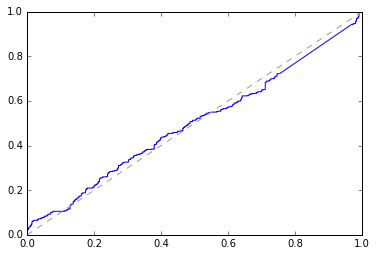

In [10]:
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')